## Description : 

### Please answer the following questions based on Mcdonald CSV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")

import scipy.stats as stats

#%pip install pygal

import pygal as pyg



In [2]:
df = pd.read_csv('C:\\Users\\siva\\Desktop\\DSBA\\SMDM\\McDonald Assignment\McDonald .csv')

## Reading the first 5 rows of the Dataset

In [3]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


## Collecting the information about the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

This dataset has all variables with no null values in it.

## Plot graphically which food categories have the highest and lowest varieties.

### Using Bar Chart

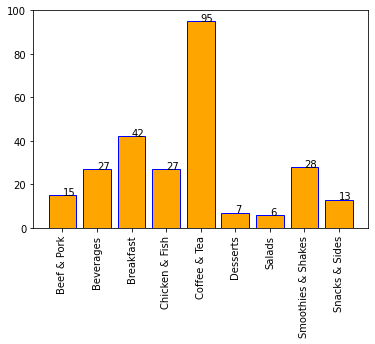

In [5]:
food_category = df.groupby('Category').count()

x = food_category.index
y = food_category['Item'] 

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(0,100)
plt.bar(x,y,color = 'orange',edgecolor = 'b' , linewidth = 1)


for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i,j))


plt.xticks(rotation = 90)    

plt.show()

From the bar chart above, the food category which has highest variety is 'Coffee & Tea' and the one which has least variety is 'Salads'

## Plot graphically which food categories have the highest and lowest varieties.
### Using Pie Chart

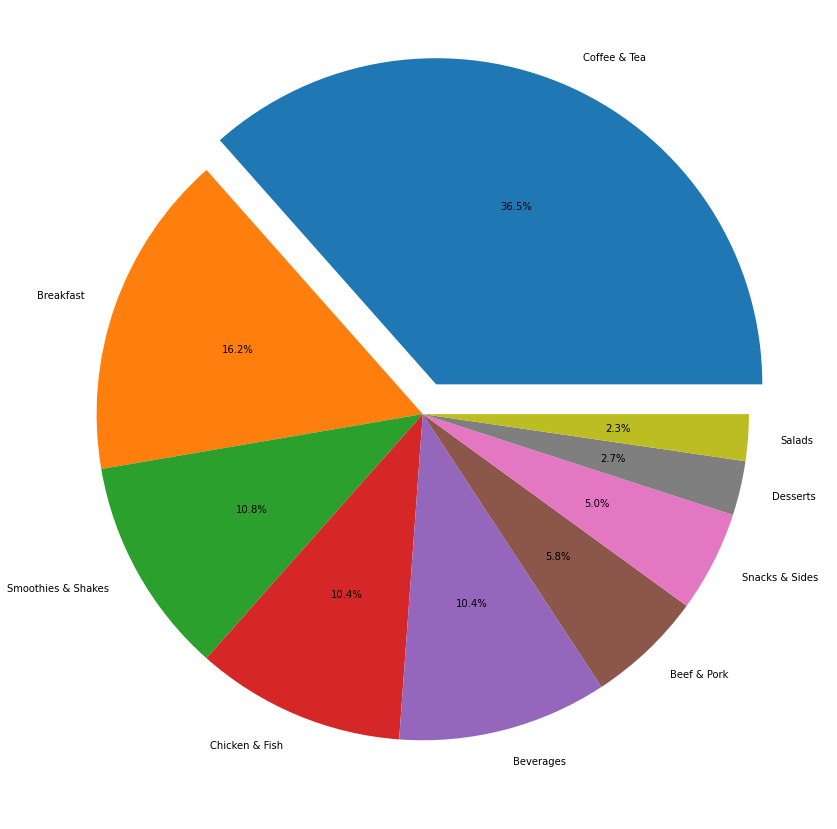

In [6]:
plt.figure(figsize=(15,15))
plt.pie(df["Category"].value_counts(),labels=df["Category"].value_counts().index,autopct='%1.1f%%',explode = (0.1,0,0,0,0,0,0,0,0));

#### From the pie chart above, the food category which contributes to highest % (36.5%) is 'Coffee & Tea' and the one which contributes to the least % (2.3%) 'Salads'


## Which all variables have an outlier?


In [7]:
df_T = df.T

a = df_T.shape
variable = df_T.index

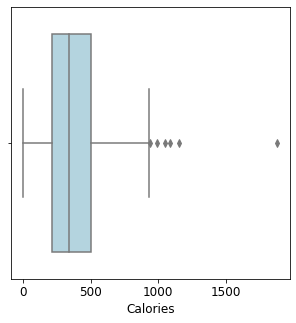

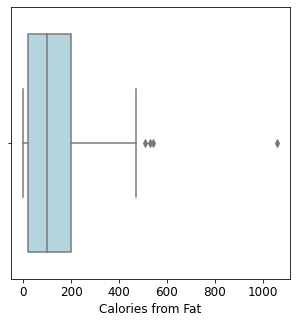

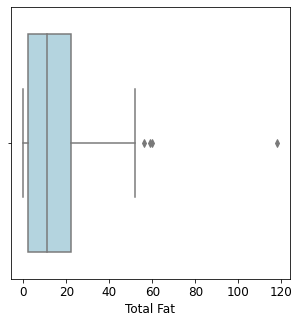

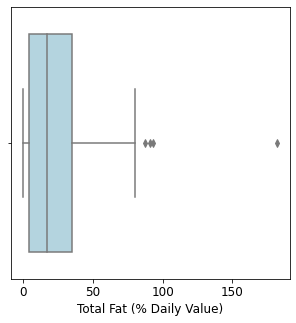

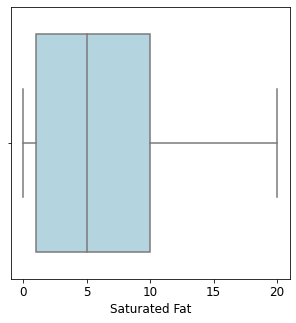

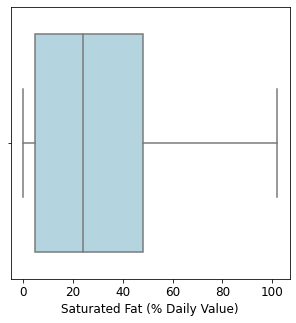

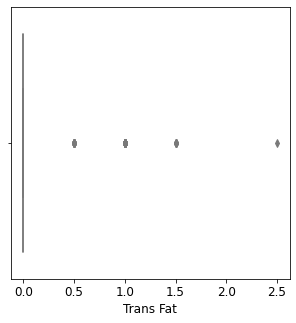

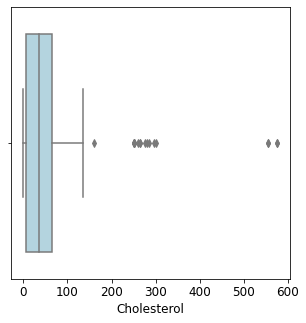

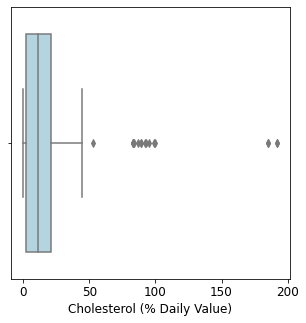

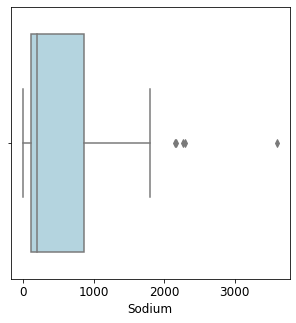

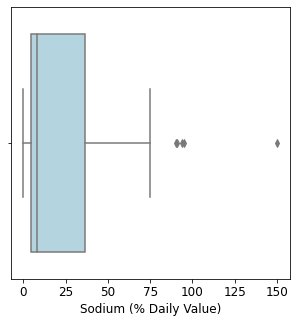

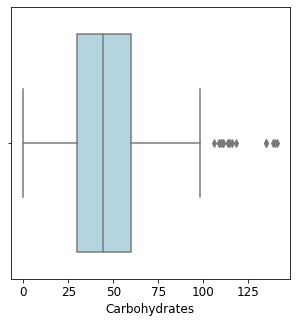

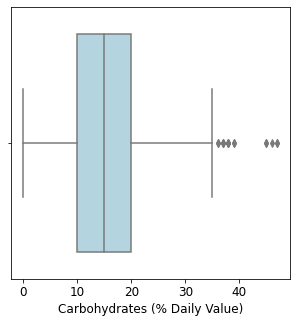

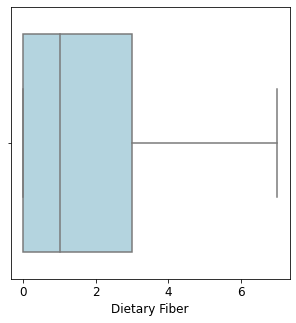

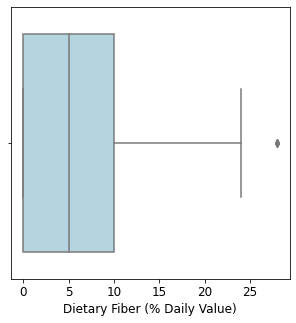

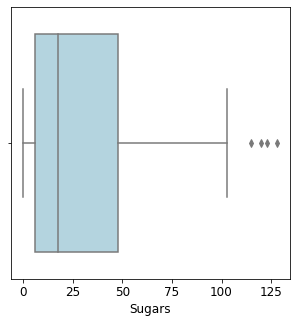

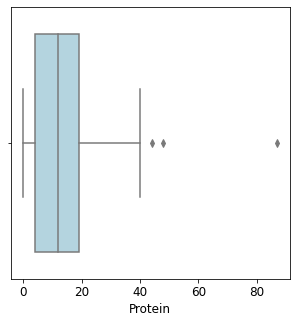

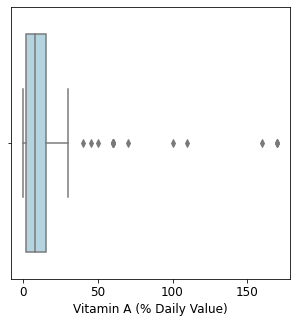

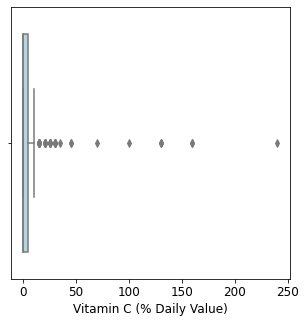

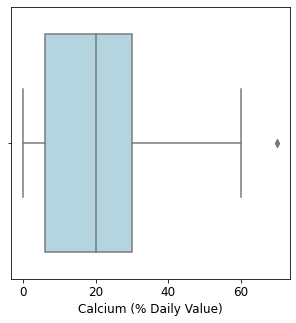

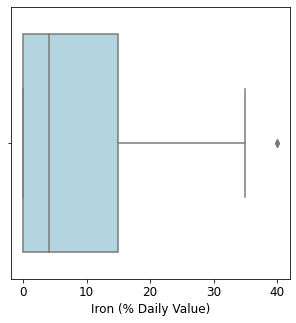

In [15]:
box_plot = pyg.Box(box_mode="tukey")

x = 3

while x < a[0]:
    plt.figure(figsize= (5,5))
    sns.boxplot(x= df_T.iloc[x], color='lightblue')
    x=x+1 
    

### out of 24 variables, 21 are having continuous values and are box plotted above to find the outliers. 
### Below variables have outliers :

#### 1. Calories
#### 2. Calories from Fat
#### 3. Total Fat
#### 4. Total Fat(% Daily Value)
#### 5. Trans Fat
#### 6. Cholestrol
#### 7. Cholestrol(% Daily Value)
#### 8. Sodium
#### 9. Sodium (% Daily Value)
#### 10. Carbohydrates
#### 11. Carbohydrates(% Daily Value)
#### 12. Dietary Fiber(% Daily Value)
#### 13. Sugars
#### 14. Protein
#### 15. Vitamin A (% Daily Value)
#### 16. Vitamin C (% Daily Value)
#### 17. Calcium (% Daily Value)
#### 18. Iron(% Daily Value)


### But let's make another attempt to get these outliers listed automatically as shown below :




In [9]:
out = df.describe().T
out['IQR'] = out['75%'] - out['25%']
out['1.5*IQR'] = 1.5*out['IQR']

out['outlier'] = ((out['min'] < (out['25%']-out['1.5*IQR'])) | (out['max'] > (out['75%']+out['1.5*IQR'])))

out1 = out.reset_index()

#out2 = pd.DataFrame(out1[out1['outlier'] == True]['index'])

out2 = list(out1[out1['outlier'] == True]['index'])



print('There are', len(out2) , 'variables that have outliers and they are listed below :\n\n', out2 )

There are 18 variables that have outliers and they are listed below :

 ['Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']


# Which variables have the highest correlation? Plot them and find out the value?

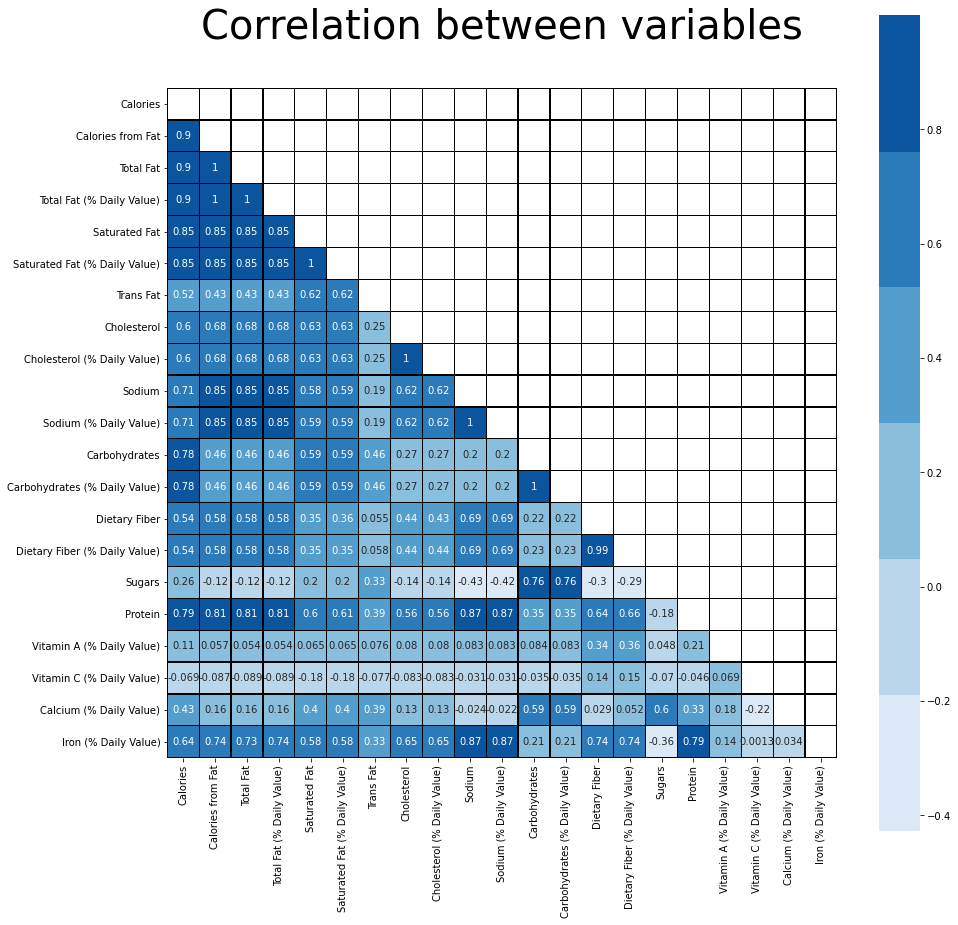

In [10]:
correlation = df.corr()

mask_upper = np.zeros_like(correlation)
mask_upper[np.triu_indices_from(mask_upper)] = True

colormap = sns.color_palette("Blues")

plt.figure(figsize = (15,15))

df_heatmap = sns.heatmap(correlation,linecolor = 'black',linewidths = 0.2,annot=True,cmap = colormap, mask=mask_upper, square=True)

df_heatmap.set_title('Correlation between variables', fontdict={'fontsize':40}, pad=50);





####  From the heatmap above and the color bar, all the dark blue cells denote strong correlation between its corresponding 'x' and 'y' coordinate variables. 

## Which category contributes to the maximum % of Cholesterol in a diet (% daily value)?

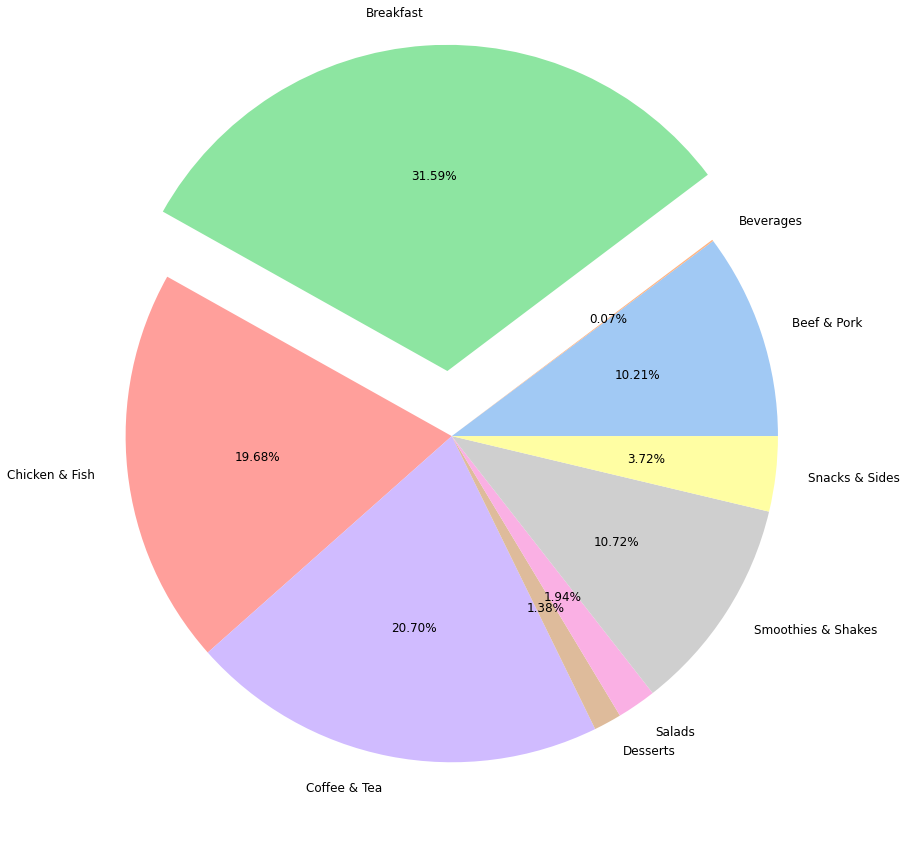

In [11]:
df_Cholestrol = df.groupby(['Category']).sum()

plt.rcParams.update({'font.size': 12})

sns.set_palette("pastel")

plt.figure(figsize=(15,15))
plt.pie(df_Cholestrol['Total Fat (% Daily Value)'],labels=df_Cholestrol.index,autopct='%1.2f%%',explode = (0,0,0.2,0,0,0,0,0,0));


### From the pie chart above, the category 'Breakfast' contributes to the maximum % of Cholesterol in a diet (% daily value) and the same is been verified below :

In [12]:
df.groupby(['Category']).sum()['Total Fat (% Daily Value)'].sort_values(ascending = False).head()

Category
Breakfast             1792
Coffee & Tea          1174
Chicken & Fish        1116
Smoothies & Shakes     608
Beef & Pork            579
Name: Total Fat (% Daily Value), dtype: int64


## Which item contributes maximum to the Sodium intake?

In [13]:
print('The item which contributes to maximum Sodium intake is ' , df[df['Sodium'] == df['Sodium'].max()]['Item'])



The item which contributes to maximum Sodium intake is  82    Chicken McNuggets (40 piece)
Name: Item, dtype: object


## Which 4 food items contain the most amount of Saturated Fat?

In [14]:
print('The 4 food items which contain the most amount of Saturated fat are : \n')

df[['Item', 'Saturated Fat']].sort_values(by='Saturated Fat', ascending = False).head(4)
    

The 4 food items which contain the most amount of Saturated fat are : 



,Item,Saturated Fat
231,Frappé Chocolate Chip (Large),20.0
82,Chicken McNuggets (40 piece),20.0
32,Big Breakfast with Hotcakes (Large Biscuit),20.0
253,McFlurry with M&M’s Candies (Medium),20.0


##  *** THE END ***